# RQ2
## Does affordability_ratio's mean differ across different regions, geotypes, and income levels? 

In order to test this, I will be using a one-way ANOVA test. Since I have three different variables where I want to see if the different groups within the variables change the mean of affordability ratio, I'll be running the ANOVA 3 times. Then, I'll be using Tukey HSD to run post-hoc testing given we reject the null hypothesis within the ANOVA. Even though we have right-skewedness, ANOVA is still reasonable because of our large sample size and the robustness of ANOVA to deviations from normality. We assume that observations are independent and that variance is homogeneous.

For this test, my null hypothesis is that affordability_ratio's mean does not differ acoss different regions, different geotypes, and different income levels. Written out for region, geotype, and income level:

Region
Null: The mean of affordability_ratio does not differ across different groups of region.
Alternative: At least one mean of affordability_ratio differs from others across different groups of region.

Geotype
Null: The mean of affordability_ratio does not differ across different groups of geotype.
Alternative: At least one mean of affordability_ratio differs from others across different groups of geotype.

Income Level
Null: The mean of affordability_ratio does not differ across different groups of income level.
Alternative: At least one mean of affordability_ratio differs from others across different groups of income level.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from utils.model_utils import one_way_anova, tukey_hsd

RANDOM_STATE = 159
np.random.seed(RANDOM_STATE)

DATA_PATH = Path("./data/food_affordability.csv")
OUT_DIR = Path("./outputs"); OUT_DIR.mkdir(exist_ok=True)
FIG_DIR = Path("./figures"); FIG_DIR.mkdir(exist_ok=True)

df_2 = pd.read_csv(DATA_PATH)
df_2.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,median_income,affordability_ratio,LL95_affordability_ratio,UL95_affordability_ratio,se_food_afford,rse_food_afford,food_afford_decile,CA_RR_Affordability,ave_fam_size,version
0,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CA,6.0,California,NaN,NaN,...,23777.0,0.315779,0.231517,0.400043,0.042991,13.614342,NaN,1.185347,3.34,4/12/2013 4:33
1,757,Food affordability for female-headed household...,2006-2010,2.0,Asian,CA,6.0,California,NaN,NaN,...,38508.0,0.194980,0.183065,0.206895,0.006079,3.117814,NaN,0.731900,3.34,4/12/2013 4:33
2,757,Food affordability for female-headed household...,2006-2010,3.0,AfricanAm,CA,6.0,California,NaN,NaN,...,26192.0,0.286664,0.279661,0.293666,0.003573,1.246349,NaN,1.076054,3.34,4/12/2013 4:33
3,757,Food affordability for female-headed household...,2006-2010,4.0,Latino,CA,6.0,California,NaN,NaN,...,22858.0,0.328475,0.322637,0.334314,0.002979,0.906881,NaN,1.233004,3.34,4/12/2013 4:33
4,757,Food affordability for female-headed household...,2006-2010,5.0,NHOPI,CA,6.0,California,NaN,NaN,...,36737.0,0.204379,0.173762,0.234997,0.015621,7.643255,NaN,0.767183,3.34,4/12/2013 4:33


In [2]:
# Slecting only necessary columns
# I also dropped large outliers to reduce the skewedness slightly
rq2_cols = ["affordability_ratio", "median_income", "region_name", "geotype"]
df_rq2 = df_2[rq2_cols].copy()
df_rq2 = df_rq2.dropna(subset=["affordability_ratio", "median_income", "region_name", "geotype"])
upper = df_rq2["affordability_ratio"].quantile(0.99)
df_rq2 = df_rq2[df_rq2["affordability_ratio"] <= upper].copy()

df_rq2.shape

df_rq2["income_group"] = pd.qcut(
    df_rq2["median_income"],
    q=4,
    labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"]
)

df_rq2["income_group"].value_counts()
df_rq2.groupby("income_group")["median_income"].mean()
df_rq2.groupby("income_group")["affordability_ratio"].mean()

income_group
Q1 (Lowest)     0.684877
Q2              0.303270
Q3              0.202455
Q4 (Highest)    0.116724
Name: affordability_ratio, dtype: float64

## ANOVA for Regions

In [3]:
# ANOVA for region
anova_region = one_way_anova(df_rq2, target="affordability_ratio", group="region_name")
anova_region

{'F': 19.996761859495177,
 'p_value': 2.538578935644317e-49,
 'n_groups': 15,
 'n_total': 3439}

My F-statistic for this test was 19.996, which leads me to a p-value of 2.54 times e^-49. This very small p-value leads me to reject the null hypothesis and we conclude that there is statistically significant evidence that at least one regional mean affordability ratio differs from the others.

Now, I will run post-hoc testing with Tukey HSD.

In [4]:
# Tukey for region
tukey_region = tukey_hsd(df_rq2, "affordability_ratio", "region_name")
tukey_region.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Bay Area,Butte,0.1848,0.0066,0.0266,0.3430,True
1,Bay Area,California,0.0164,1.0000,-0.3487,0.3815,False
2,Bay Area,Central/Southeast Sierra,0.1299,0.0663,-0.0036,0.2633,False
3,Bay Area,Monterey Bay,0.1557,0.0000,0.0546,0.2568,True
4,Bay Area,North Coast,0.1623,0.0000,0.0542,0.2704,True


Tukey HSD results indicate that the Bay Area exhibits significantly higher food affordability ratio than other inland regions like Butte, Monterey Bay, and North Coast. The reason we know that Bay Area food affordability ratio is larger is because the mean differences are positives with a low p-val. This shows a greater food cost burden in coastal regions.

## ANOVA for Geotype

In [5]:
# ANOVA for geotype
anova_geotype = one_way_anova(df_rq2, target="affordability_ratio", group="geotype")
anova_geotype

{'F': 0.2205838707762331,
 'p_value': 0.8821537113878416,
 'n_groups': 4,
 'n_total': 3439}

My F-statistic for this test was 0.22, which leads me to a p-value of 0.88. This large p-value leads me to fail to reject the null hypothesis and we conclude that there is no statistically significant evidence that at least one regional mean affordability ratio differs from the others.

I will not run post-hoc testing with Tukey HSD in this case.

## ANOVA for Income Level

In [6]:
# ANOVA for income level
anova_income_level = one_way_anova(df_rq2, target="affordability_ratio", group="income_group")
anova_income_level

{'F': 850.1216693204053, 'p_value': 0.0, 'n_groups': 4, 'n_total': 3439}

In [7]:
# Tukey for income level
tukey_income_level = tukey_hsd(df_rq2, "affordability_ratio", "income_group")
tukey_income_level.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Q1 (Lowest),Q2,-0.3816,0.0,-0.4129,-0.3504,True
1,Q1 (Lowest),Q3,-0.4824,0.0,-0.5137,-0.4512,True
2,Q1 (Lowest),Q4 (Highest),-0.5682,0.0,-0.5994,-0.5369,True
3,Q2,Q3,-0.1008,0.0,-0.1321,-0.0695,True
4,Q2,Q4 (Highest),-0.1865,0.0,-0.2178,-0.1553,True


Post-hoc with Tukey HSD shows there are statistically significant differences in mean food affordability ratios throughout Q1, Q2, Q3, and Q4. Even though affordability ratios increase as you go from Q1 to Q4, every higher income group shows a larger food cost burden than the group before it. The higher income regions show higher affordability ratios, which might suggest that food costs are disproportionately increasing with income level across Californian regions.

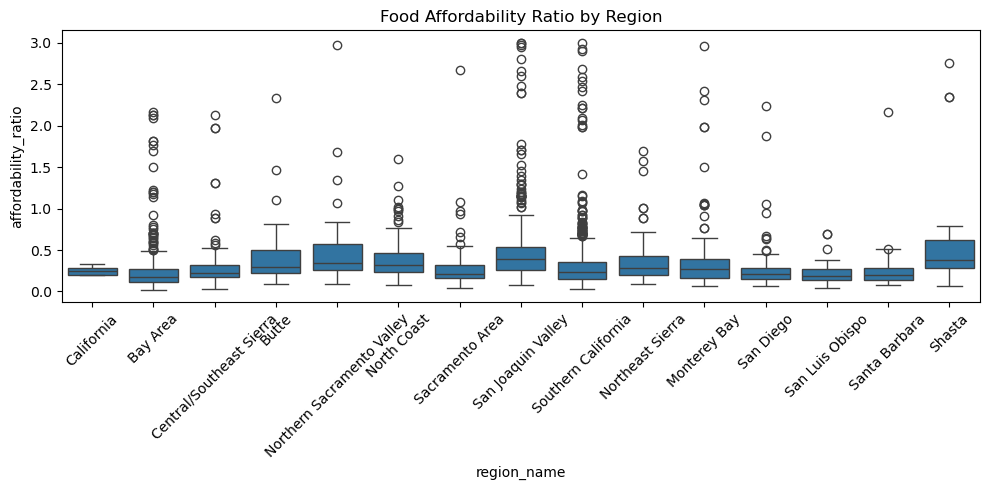

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df_rq2,
    x="region_name",
    y="affordability_ratio"
)
plt.xticks(rotation=45)
plt.title("Food Affordability Ratio by Region")
plt.tight_layout()
plt.savefig('figures/rq2_boxplot.png', dpi=150)
plt.show()

This figure shows the spread of food affordability raito by region.

## Conclusion for RQ2

For this question, I aimed to look at potential differences in mean of affordability ratio in region, income level, and geotype. I concluded that there were signficiant differences in mean between region and income level, but not geotype.